<a href="https://colab.research.google.com/github/MaharshiYeluri01/CreditCard_Defaulters_Prediction/blob/master/CreditCardDefaulters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Collecting Data

In [1]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 70 Jan 11 16:44 kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d uciml/default-of-credit-card-clients-dataset

  0% 0.00/999k [00:00<?, ?B/s]
100% 999k/999k [00:00<00:00, 65.5MB/s]


In [0]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
#from ggplot import *
%matplotlib inline

In [0]:
import zipfile
zip_ref = zipfile.ZipFile("default-of-credit-card-clients-dataset.zip", 'r')
zip_ref.extractall("Creditcard_raw_data")
zip_ref.close()

In [10]:
df = pd.read_csv('./Creditcard_raw_data/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<h1>Exploratory Data Analysis</h1>

In [11]:
print(df.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


In [0]:
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


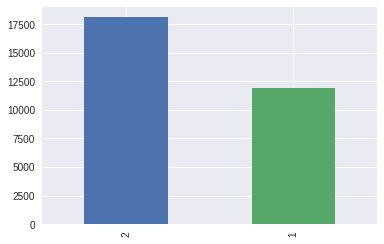

In [12]:
df['SEX'].value_counts().plot(kind='bar')


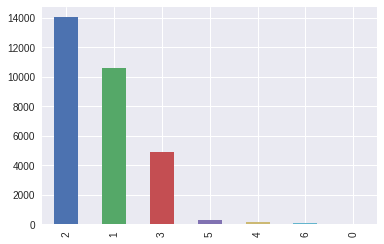

In [13]:
df['EDUCATION'].value_counts().plot(kind='bar')


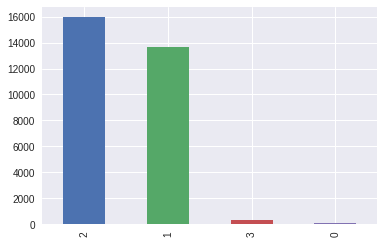

In [15]:

df['MARRIAGE'].value_counts().plot(kind='bar')

No missing data, but a few anomalous things:

EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.
MARRIAGE has a label 0 that is undocumented

In [20]:
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


They all present an undocumented label -2. If 1,2,3, etc are the months of delay, 0 should be labeled 'pay duly' and every negative value should be seen as a 0. But we will get to that later

In [21]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [22]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [23]:
df = df.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [24]:
df['def_pay'].value_counts()

0    23364
1     6636
Name: def_pay, dtype: int64

In [25]:
df.SEX.value_counts() 

2    18112
1    11888
Name: SEX, dtype: int64

In [26]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

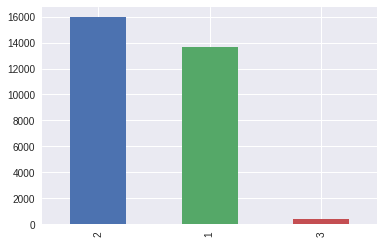

In [27]:
df.MARRIAGE.value_counts().plot(kind = 'bar')

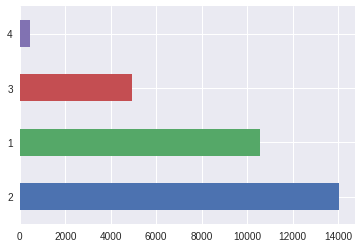

In [28]:
df.EDUCATION.value_counts().plot(kind = "barh")

In [0]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

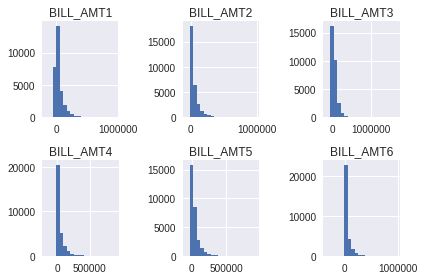

In [30]:
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

In [0]:
def draw_dist(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure(10)
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.distplot(a=df[var_name],bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

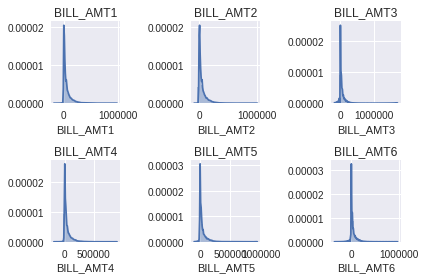

In [32]:
draw_dist(bills, bills.columns, 2, 3, 30)

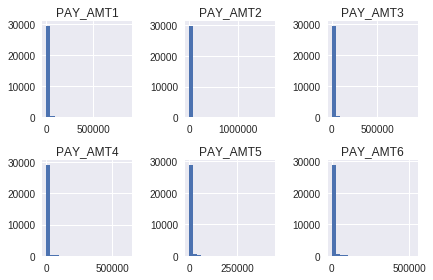

In [33]:
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)

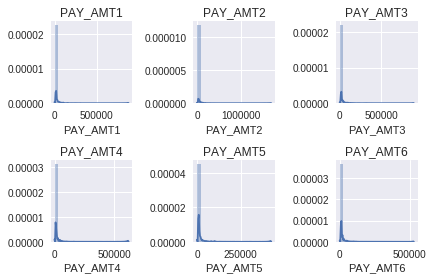

In [34]:
draw_dist(pay, pay.columns, 2, 3, 20)

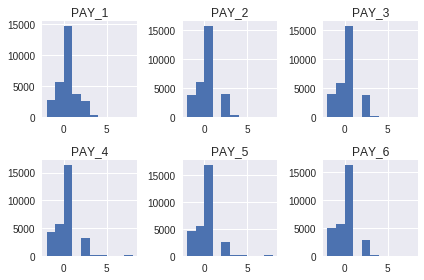

In [35]:


late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

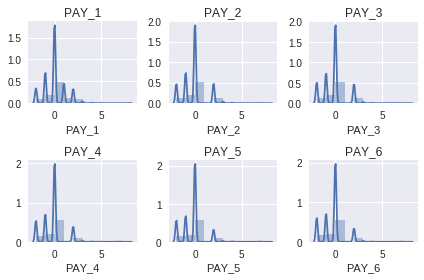

In [36]:
draw_dist(late, late.columns, 2, 3, 10)

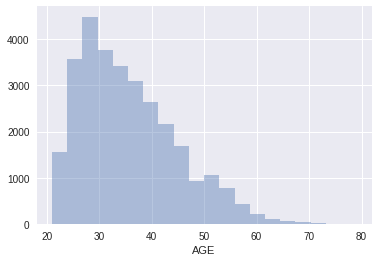

In [37]:
sns.distplot(a=df['AGE'],bins=20,kde=False)

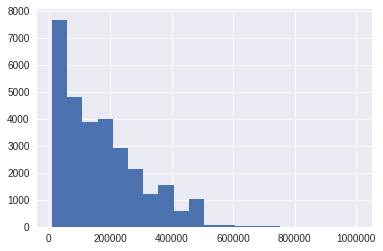

In [38]:
df.LIMIT_BAL.hist(bins = 20)

observation is that the quantities referred to some amount of money have a very large range, which can cause problems to some some models (for example in linear regression models)

<h1>Data Cleaning</h1>
As seen previously, some categories are mislabeled or undocumented. Before proceeding, it is time to fix it.

The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).

The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)



In [39]:
df.loc[[2,4]]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [40]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [41]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

"Other" in marriage could be, for example, "divorced".

According to our documentation, the PAY_n variables indicate the number of months of delay and indicates "pay duly"with -1. Then what is -2? And what is 0? It seems to me the label has to be adjusted to 0 for pay duly.

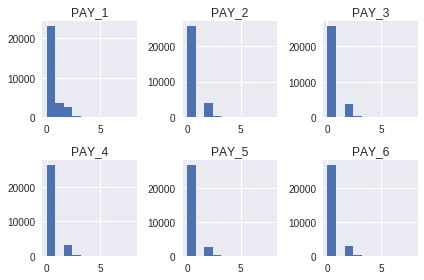

In [42]:
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

In [43]:
df[df.PAY_AMT1 > 300000][['LIMIT_BAL', 'PAY_1', 'PAY_2', 'BILL_AMT2', 
                          'PAY_AMT1', 'BILL_AMT1', 'def_pay']]

,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT2,PAY_AMT1,BILL_AMT1,def_pay
2687,500000.0,0,0,367979.0,368199.0,71921.0,0
5687,480000.0,0,0,400000.0,302000.0,106660.0,0
8500,400000.0,0,0,405016.0,405016.0,6500.0,0
12330,300000.0,1,0,324392.0,505000.0,-165580.0,0
25431,170000.0,0,0,167941.0,304815.0,30860.0,0
28003,510000.0,0,0,481382.0,493358.0,71121.0,0
28716,340000.0,0,0,176743.0,873552.0,139808.0,0
29820,400000.0,1,0,394858.0,423903.0,396343.0,0
29867,340000.0,0,0,331641.0,300039.0,44855.0,0
29963,610000.0,0,0,322228.0,323014.0,348392.0,0


In [44]:
df[df.PAY_AMT2 > 300000][['LIMIT_BAL', 'PAY_2', 'PAY_3', 'BILL_AMT3', 
                          'PAY_AMT2', 'BILL_AMT2', 'def_pay']]

,LIMIT_BAL,PAY_2,PAY_3,BILL_AMT3,PAY_AMT2,BILL_AMT2,def_pay
2592,480000.0,0,0,339176.0,344261.0,38929.0,0
3774,500000.0,0,0,301441.0,302961.0,39356.0,0
5296,500000.0,0,0,1664089.0,1684259.0,-18088.0,0
5400,500000.0,0,0,385228.0,385228.0,8970.0,0
6150,300000.0,0,0,4735.0,344467.0,-5973.0,1
6864,500000.0,0,0,444462.0,300018.0,201402.0,0
9044,500000.0,0,0,384973.0,384986.0,24201.0,0
11568,430000.0,0,0,354716.0,358689.0,960.0,1
11853,360000.0,1,0,338600.0,361560.0,-22960.0,0
12829,340000.0,0,0,330510.0,312723.0,335584.0,1


A quick check on all the others reveal that they are not outliers but simply clients with a lot of money.

In [45]:
df.groupby(['SEX', 'def_pay']).size()

SEX  def_pay
1    0           9015
     1           2873
2    0          14349
     1           3763
dtype: int64

In [46]:
gender = df.groupby(['SEX', 'def_pay']).size().unstack(1)
print(gender)


def_pay      0     1
SEX                 
1         9015  2873
2        14349  3763


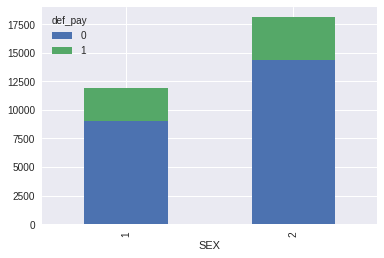

In [47]:
gender.plot(kind='bar', stacked = True)

In [0]:
gender['perc'] = (gender[1]/(gender[0] + gender[1]))

In [49]:
print(gender)

def_pay      0     1      perc
SEX                           
1         9015  2873  0.241672
2        14349  3763  0.207763


Considering that about 22% of the customers will default, we see a couple of things:

there are significantly more women than men

men are most likely going to default the next month

However, we don't have to jump to any conclusion just yet since there might be some lurking variable that justifies the data better (and, being SEX the first variable we look at, it is most likely the case). 

In [0]:
def corr_2_cols(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [51]:
corr_2_cols('EDUCATION', 'def_pay')

def_pay,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


It seems that the higher is the education, the lower is the probability of defaulting the next month. Only exception is for the category labeled "Other" that, if we stick to the documentation, would be lower than high school. However, numerically they will not have much weight in the final result.

Let's see with MARRIAGE.

In [52]:
corr_2_cols('MARRIAGE', 'def_pay')

def_pay,0,1,perc
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,288,89,0.236074


Here it seems that married people are most likely to default as well as the misterious category "Other" ( which is again numerically less relevant than the others)

All considered, these three categories seem to affect the result we want to predict. Thus we keep them in mind for later.


In [53]:
corr_2_cols('MARRIAGE', 'SEX')

SEX,1,2,perc
MARRIAGE,,,
1,5190,8469,0.620031
2,6553,9411,0.589514
3,145,232,0.615385


In [54]:
corr_2_cols('EDUCATION', 'SEX')

SEX,1,2,perc
EDUCATION,,,
1,4354,6231,0.588663
2,5374,8656,0.616964
3,1990,2927,0.595282
4,170,298,0.636752


now I want to see if my suspects on the payments and the bills have some foundation

In [55]:
df[['PAY_AMT6', 'BILL_AMT6', 'PAY_AMT5', 
     'BILL_AMT5', 'PAY_AMT4', 'BILL_AMT4', 'PAY_AMT3', 'BILL_AMT3', 
     'PAY_AMT2', 'BILL_AMT2',
     'PAY_AMT1', 'BILL_AMT1',
     'LIMIT_BAL', 'def_pay']].sample(30)

,PAY_AMT6,BILL_AMT6,PAY_AMT5,BILL_AMT5,PAY_AMT4,BILL_AMT4,PAY_AMT3,BILL_AMT3,PAY_AMT2,BILL_AMT2,PAY_AMT1,BILL_AMT1,LIMIT_BAL,def_pay
11292,0.0,0.0,0.0,0.0,0.0,1460.0,0.0,1460.0,1460.0,177.0,177.0,0.0,140000.0,1
23952,2000.0,12758.0,3000.0,9928.0,15460.0,19565.0,1203.0,20365.0,1378.0,20240.0,4.0,20873.0,20000.0,1
6920,0.0,2712.0,2712.0,0.0,0.0,0.0,0.0,3210.0,3210.0,0.0,0.0,0.0,260000.0,1
1623,200.0,19950.0,19950.0,25784.0,25784.0,12654.0,12654.0,10719.0,10725.0,2074.0,2081.0,2104.0,170000.0,0
27925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2500.0,360000.0,0
4523,5723.0,1416.0,1416.0,1416.0,1416.0,1416.0,1416.0,1416.0,1416.0,1110.0,1110.0,1110.0,500000.0,0
8543,0.0,39360.0,4632.0,35711.0,1280.0,35970.0,22703.0,34605.0,1600.0,33885.0,1880.0,34203.0,40000.0,0
20121,4789.0,135383.0,8008.0,129441.0,50000.0,181156.0,6500.0,186698.0,8638.0,185099.0,10024.0,185129.0,230000.0,0
29258,1925.0,52174.0,0.0,53153.0,7042.0,46918.0,1807.0,45870.0,20000.0,26351.0,0.0,32536.0,70000.0,0
21707,480.0,9182.0,479.0,8996.0,467.0,8824.0,1295.0,7820.0,0.0,8092.0,1291.0,7067.0,10000.0,1


In [56]:
df[df.def_pay == 1][['BILL_AMT2',
     'PAY_AMT1', 'BILL_AMT1', 'PAY_1',
     'LIMIT_BAL']].sample(30)

,BILL_AMT2,PAY_AMT1,BILL_AMT1,PAY_1,LIMIT_BAL
3503,34105.0,29000.0,5310.0,0,50000.0
9252,2855.0,2855.0,8069.0,0,170000.0
13555,61742.0,3000.0,79453.0,0,210000.0
23465,28718.0,1.0,29498.0,2,30000.0
10139,31472.0,2000.0,36406.0,0,80000.0
121,0.0,0.0,0.0,1,450000.0
4187,50428.0,2200.0,50764.0,0,50000.0
16438,3147.0,3147.0,8280.0,0,140000.0
17891,45103.0,2600.0,43531.0,2,100000.0
13674,13808.0,0.0,14320.0,1,30000.0


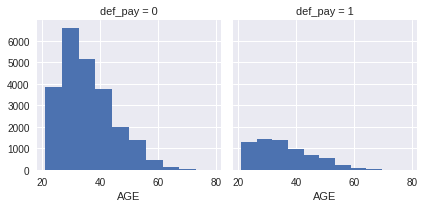

In [57]:
sns.FacetGrid(df, col = 'def_pay').map(plt.hist, 'AGE')


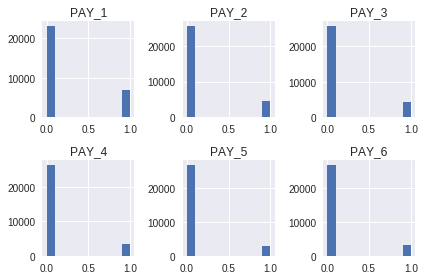

In [58]:
df.loc[df.PAY_1 > 0, 'PAY_1'] = 1
df.loc[df.PAY_2 > 0, 'PAY_2'] = 1
df.loc[df.PAY_3 > 0, 'PAY_3'] = 1
df.loc[df.PAY_4 > 0, 'PAY_4'] = 1
df.loc[df.PAY_5 > 0, 'PAY_5'] = 1
df.loc[df.PAY_6 > 0, 'PAY_6'] = 1
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

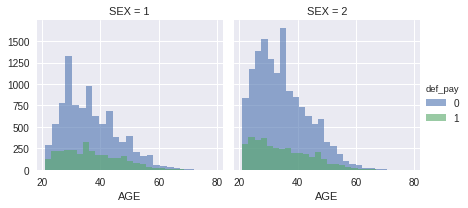

In [59]:
g = sns.FacetGrid(df, col='SEX', hue='def_pay')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

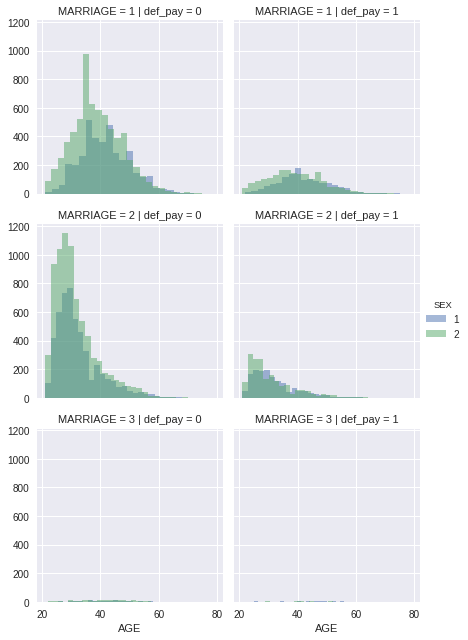

In [60]:
g = sns.FacetGrid(df, col='def_pay', row= "MARRIAGE", hue='SEX')
g.map(plt.hist, 'AGE', alpha=0.5, bins=25) 
g.add_legend()

#Feature Engineering

In [61]:
df['SE_MA'] = df.SEX * df.MARRIAGE
corr_2_cols('SE_MA', 'def_pay')

def_pay,0,1,perc
SE_MA,,,
1,3844,1346,0.259345
2,11677,3345,0.222673
3,103,42,0.289655
4,7555,1856,0.197216
6,185,47,0.202586


In [62]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay,SE_MA
0,1,20000.0,2,2,1,24,1,1,0,0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,2
1,2,120000.0,2,2,2,26,0,1,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,4
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,4
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,2
4,5,50000.0,1,2,1,57,0,0,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1


In [0]:
df['SE_MA_2'] = 0
df.loc[((df.SEX == 1) & (df.MARRIAGE == 1)) , 'SE_MA_2'] = 1 #married man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 2)) , 'SE_MA_2'] = 2 #single man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 3)) , 'SE_MA_2'] = 3 #divorced man
df.loc[((df.SEX == 2) & (df.MARRIAGE == 1)) , 'SE_MA_2'] = 4 #married woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 2)) , 'SE_MA_2'] = 5 #single woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 3)) , 'SE_MA_2'] = 6 #divorced woman
corr_2_cols('SE_MA_2', 'def_pay')

def_pay,0,1,perc
SE_MA_2,,,
1,3844,1346,0.259345
2,5068,1485,0.226614
3,103,42,0.289655
4,6609,1860,0.219625
5,7555,1856,0.197216
6,185,47,0.202586


In [0]:
del df['SE_MA']
df = df.rename(columns={'SE_MA_2': 'SE_MA'})

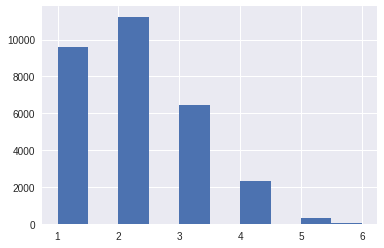

In [0]:
df['AgeBin'] = 0 #creates a column of 0
df.loc[((df['AGE'] > 20) & (df['AGE'] < 30)) , 'AgeBin'] = 1
df.loc[((df['AGE'] >= 30) & (df['AGE'] < 40)) , 'AgeBin'] = 2
df.loc[((df['AGE'] >= 40) & (df['AGE'] < 50)) , 'AgeBin'] = 3
df.loc[((df['AGE'] >= 50) & (df['AGE'] < 60)) , 'AgeBin'] = 4
df.loc[((df['AGE'] >= 60) & (df['AGE'] < 70)) , 'AgeBin'] = 5
df.loc[((df['AGE'] >= 70) & (df['AGE'] < 81)) , 'AgeBin'] = 6
df.AgeBin.hist()

In [0]:
corr_2_cols('AgeBin', 'def_pay')

def_pay,0,1,perc
AgeBin,,,
1,7421,2197,0.228426
2,8962,2276,0.202527
3,4979,1485,0.229734
4,1759,582,0.248612
5,225,89,0.283439
6,18,7,0.280000


In [0]:
corr_2_cols('AgeBin', 'SEX')

SEX,1,2,perc
AgeBin,,,
1,3281,6337,0.658869
2,4565,6673,0.593789
3,2771,3693,0.571318
4,1092,1249,0.533533
5,166,148,0.471338
6,13,12,0.480000


I see that default probability goes down in your 30's and then goes higher and higher. At the same time, the percentage of men is growing with the age category. Thus I want to combine the two as before and create a combination of the two.

In [0]:
df['SE_AG'] = 0
df.loc[((df.SEX == 1) & (df.AgeBin == 1)) , 'SE_AG'] = 1 #man in 20's
df.loc[((df.SEX == 1) & (df.AgeBin == 2)) , 'SE_AG'] = 2 #man in 30's
df.loc[((df.SEX == 1) & (df.AgeBin == 3)) , 'SE_AG'] = 3 #man in 40's
df.loc[((df.SEX == 1) & (df.AgeBin == 4)) , 'SE_AG'] = 4 #man in 50's
df.loc[((df.SEX == 1) & (df.AgeBin == 5)) , 'SE_AG'] = 5 #man in 60's and above
df.loc[((df.SEX == 2) & (df.AgeBin == 1)) , 'SE_AG'] = 6 #woman in 20's
df.loc[((df.SEX == 2) & (df.AgeBin == 2)) , 'SE_AG'] = 7 #woman in 30's
df.loc[((df.SEX == 2) & (df.AgeBin == 3)) , 'SE_AG'] = 8 #woman in 40's
df.loc[((df.SEX == 2) & (df.AgeBin == 4)) , 'SE_AG'] = 9 #woman in 50's
df.loc[((df.SEX == 2) & (df.AgeBin == 5)) , 'SE_AG'] = 10 #woman in 60's and above
corr_2_cols('SE_AG', 'def_pay')

def_pay,0,1,perc
SE_AG,,,
0,18,7,0.280000
1,2492,789,0.240475
2,3515,1050,0.230011
3,2080,691,0.249368
4,797,295,0.270147
5,122,44,0.265060
6,4929,1408,0.222187
7,5447,1226,0.183725
8,2899,794,0.215001


Now it is time to do something that indicates being a client at a given month or not. I would say that if PAY, BILL_AMT and PAY_AMT are 0, then we are not talking about a client

In [0]:
df['Client_6'] = 1
df['Client_5'] = 1
df['Client_4'] = 1
df['Client_3'] = 1
df['Client_2'] = 1
df['Client_1'] = 1
df.loc[((df.PAY_6 == 0) & (df.BILL_AMT6 == 0) & (df.PAY_AMT6 == 0)) , 'Client_6'] = 0
df.loc[((df.PAY_5 == 0) & (df.BILL_AMT5 == 0) & (df.PAY_AMT5 == 0)) , 'Client_5'] = 0
df.loc[((df.PAY_4 == 0) & (df.BILL_AMT4 == 0) & (df.PAY_AMT4 == 0)) , 'Client_4'] = 0
df.loc[((df.PAY_3 == 0) & (df.BILL_AMT3 == 0) & (df.PAY_AMT3 == 0)) , 'Client_3'] = 0
df.loc[((df.PAY_2 == 0) & (df.BILL_AMT2 == 0) & (df.PAY_AMT2 == 0)) , 'Client_2'] = 0
df.loc[((df.PAY_1 == 0) & (df.BILL_AMT1 == 0) & (df.PAY_AMT1 == 0)) , 'Client_1'] = 0
pd.Series([df[df.Client_6 == 1].def_pay.count(),
          df[df.Client_5 == 1].def_pay.count(),
          df[df.Client_4 == 1].def_pay.count(),
          df[df.Client_3 == 1].def_pay.count(),
          df[df.Client_2 == 1].def_pay.count(),
          df[df.Client_1 == 1].def_pay.count()], [6,5,4,3,2,1])

6    26700
5    27247
4    27572
3    27810
2    28183
1    29477
dtype: int64

I will need these variables if I want to see how my predictions will change if I anticipate them (i. e. if I use data up to june instead of up to september)

Next, I want something to describe the expenses of a client, following the idea I have expressed before when I looked at the BILL AMT and the PAY AMT. I am thinking of something like average expenses at any given month (again, for this first prediction I will just care about the last month but I might need the others later). Moreover, I want to give some context to it, so I will divide that number by LIMIT_BAL, so that we have a sort of extimation of how "careless" a client is

To me it seems that it goes like that:

I have a BILL of X, I pay Y

The month after I have to pay X-Y + X', being X' my new expenses, I pay Y'

The month after I have to pay X+X' - Y - Y' + X'' , I pay Y''
So on so forth
On top of that I may or may not have months of delay.

It seems that if by september I have a bill too close to my limit, I generally fail. However, I can already see some dramatic exceptions.

Moreover, I can spot some clients that joined our dataset at a later month: they have 0 in BILL and PAY AMT for a while and then they start. I have to keep that in mind as well.

Now I want to see how the month of delay gets assigned. To this end, I will consider only people with no delays 6 months ago and see how their payments go.

In [0]:
df['Avg_exp_5'] = ((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5']))) / df['LIMIT_BAL']
df['Avg_exp_4'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4']))) / 2) / df['LIMIT_BAL']
df['Avg_exp_3'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3']))) / 3) / df['LIMIT_BAL']
df['Avg_exp_2'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3'])) +
                 (df['BILL_AMT2'] - (df['BILL_AMT3'] - df['PAY_AMT2']))) / 4) / df['LIMIT_BAL']
df['Avg_exp_1'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3'])) +
                 (df['BILL_AMT2'] - (df['BILL_AMT3'] - df['PAY_AMT2'])) +
                 (df['BILL_AMT1'] - (df['BILL_AMT2'] - df['PAY_AMT1']))) / 5) / df['LIMIT_BAL']
df[['LIMIT_BAL', 'Avg_exp_5', 'BILL_AMT5', 'Avg_exp_4', 'BILL_AMT4','Avg_exp_3', 'BILL_AMT3',
    'Avg_exp_2', 'BILL_AMT2', 'Avg_exp_1', 'BILL_AMT1', 'def_pay']].sample(20)

,LIMIT_BAL,Avg_exp_5,BILL_AMT5,Avg_exp_4,BILL_AMT4,Avg_exp_3,BILL_AMT3,Avg_exp_2,BILL_AMT2,Avg_exp_1,BILL_AMT1,def_pay
11504,50000.0,0.000000,0.0,0.036600,3660.0,0.043987,6525.0,0.058415,10610.0,0.047548,9659.0,0
10074,180000.0,0.003333,228.0,0.001667,0.0,0.007963,3700.0,0.069111,45460.0,0.076078,18710.0,0
7141,30000.0,0.051700,1551.0,0.097700,4311.0,0.101356,3260.0,0.082517,780.0,0.066013,0.0,0
10128,130000.0,0.009900,70369.0,0.009700,68904.0,0.010826,70604.0,0.011375,65997.0,0.011585,67612.0,1
6379,70000.0,0.009257,30379.0,0.007986,28449.0,0.008967,28184.0,0.009436,28943.0,0.008777,25773.0,1
2763,20000.0,0.096700,10962.0,0.145650,14354.0,0.196800,19836.0,0.164912,16221.0,0.142210,15749.0,0
15495,30000.0,0.009000,7972.0,0.006500,7092.0,0.007233,6353.0,0.007450,5096.0,0.007440,4318.0,0
2655,260000.0,0.014300,3718.0,0.013260,6895.0,0.008840,0.0,0.006630,0.0,0.006083,1013.0,1
22218,250000.0,0.005192,33246.0,0.020866,41381.0,0.018341,43194.0,0.017324,44742.0,0.019785,50122.0,0
22680,360000.0,0.016489,5935.0,0.043000,24472.0,0.036288,7486.0,0.032180,6571.0,0.028231,3899.0,0


One last thing: how far the bill is from the limit should matter, thus I will create that variable. Since the result can vary a lot from one client to the other (the LIMIT_BAL variable has a very wide range), I will again weight this difference on the LIMIT_BAL feature (in my mind it has more meaning, maybe I am wrong). Again, I want to keep the historical trend of the variable

In [0]:
df['Closeness_6'] = (df.LIMIT_BAL - df.BILL_AMT6) / df.LIMIT_BAL
df['Closeness_5'] = (df.LIMIT_BAL - df.BILL_AMT5) / df.LIMIT_BAL
df['Closeness_4'] = (df.LIMIT_BAL - df.BILL_AMT4) / df.LIMIT_BAL
df['Closeness_3'] = (df.LIMIT_BAL - df.BILL_AMT3) / df.LIMIT_BAL
df['Closeness_2'] = (df.LIMIT_BAL - df.BILL_AMT2) / df.LIMIT_BAL
df['Closeness_1'] = (df.LIMIT_BAL - df.BILL_AMT1) / df.LIMIT_BAL
df[['Closeness_6', 'Closeness_5', 'Closeness_4', 'Closeness_3', 'Closeness_2',
   'Closeness_1', 'def_pay']].sample(20)

,Closeness_6,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1,def_pay
5778,0.455933,0.328983,0.333400,0.332400,0.335233,0.084667,0
6269,0.999405,0.962987,0.968400,0.968683,0.999650,0.999650,0
14130,0.640881,0.598741,0.618433,0.578626,0.574781,0.589196,0
9127,0.932960,0.917645,0.902365,0.876940,0.413540,0.397425,0
24716,0.105650,0.167050,0.279550,0.252700,0.381400,0.421350,1
7827,0.336717,0.360175,0.375850,0.390583,0.390475,0.742292,0
26335,1.000000,0.964927,0.995503,0.964193,0.997373,0.997067,1
13754,0.091200,0.067820,0.083647,0.052407,0.030613,0.056933,0
15649,1.000000,1.000000,1.000000,1.000000,0.987424,0.873067,0
1717,0.941441,0.990553,0.991812,0.993659,0.992100,0.974506,1


#Feature Selection

First, I decide which features I want to include in my models and split the data into training and testing set. It is very important to never let the learning algorithm "see" the testing set or you will always be considered a cheater.

I will not include the PAY_n features because I don't know how they appear, I will use AgeBin rather than AGE, I will not include SEX because the small correlation do not make sense to me and I have created two categories that include SEX

In [0]:
features = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3', 
            'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
            'SE_MA', 'AgeBin', 'SE_AG', 'Avg_exp_5', 'Avg_exp_4',
            'Avg_exp_3', 'Avg_exp_2', 'Avg_exp_1', 'Closeness_5',
            'Closeness_4', 'Closeness_3', 'Closeness_2','Closeness_1']
y = df['def_pay'].copy() # target
X = df[features].copy()
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
print(X_train.shape)
print(X_test.shape)

(24000, 34)
(6000, 34)


#Sampling

Samples,

Within my train dataset I still have a certain unbalance in the target class,

thus I can do the following:

I don't care, I will just pick the best model

I upsample the minority class

I downsample the majority class

I create a syntetic sample

I will just do all of it and see how it goes.

IMPORTANT: everything will happen on the train dataset

In [0]:
df_train = X_train.join(y_train)
df_train.sample(10)

,LIMIT_BAL,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,Avg_exp_4,Avg_exp_3,Avg_exp_2,Avg_exp_1,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1,def_pay
13386,150000.0,3,1,0,0,0,0,0,0,108755.0,...,0.010200,0.010136,0.012553,0.011861,0.210873,0.227693,0.242780,0.249640,0.274967,0
9369,360000.0,2,2,0,0,0,0,0,0,336179.0,...,0.043592,0.048582,0.050176,0.134129,0.635150,0.596744,0.552158,0.517275,0.066169,0
18681,20000.0,1,2,0,0,0,0,0,0,4734.0,...,0.000000,0.000000,0.000000,0.047340,1.000000,1.000000,1.000000,1.000000,0.763300,1
6265,90000.0,2,1,0,0,0,0,0,0,88758.0,...,0.063844,0.196574,0.156572,0.131876,0.485533,0.445311,0.001378,0.003556,0.013800,0
22308,20000.0,2,2,0,0,0,0,0,0,14248.0,...,0.095150,0.073650,0.062275,0.055270,0.069750,0.093650,0.143000,0.214850,0.287600,0
5531,190000.0,2,2,1,0,0,0,0,0,0.0,...,0.011734,0.007823,0.005867,0.004694,0.997384,0.988153,0.988153,1.000000,1.000000,0
25999,20000.0,2,1,0,0,0,0,0,0,10001.0,...,0.083750,0.112900,0.291975,0.145150,0.924500,0.832850,0.712000,-0.042200,0.499950,0
8132,310000.0,2,2,0,0,0,0,0,0,107.0,...,0.000379,0.000253,0.000190,0.000221,1.000000,0.999242,1.000000,1.000000,0.999655,0
1753,60000.0,2,1,0,0,0,0,0,0,33147.0,...,0.038617,0.273289,0.223067,0.188943,0.539000,0.523183,0.063883,0.091483,0.447550,0
15186,80000.0,2,2,0,0,0,0,0,0,60423.0,...,0.117744,0.089254,0.181669,0.163610,0.952375,0.764513,0.744912,0.311000,0.244712,0


In [0]:
from sklearn.utils import resample

df_majority = df_train[df_train.def_pay==0]
df_minority = df_train[df_train.def_pay==1]

print(df_majority.def_pay.count())
print("-----------")
print(df_minority.def_pay.count())
print("-----------")
print(df_train.def_pay.value_counts())

18677
-----------
5323
-----------
0    18677
1     5323
Name: def_pay, dtype: int64


In [0]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=18677,    # to match majority class
                                 random_state=0) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.def_pay.value_counts()

1    18677
0    18677
Name: def_pay, dtype: int64

In [0]:
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=5323,     # to match minority class
                                 random_state=0) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.def_pay.value_counts()

1    5323
0    5323
Name: def_pay, dtype: int64

#Model Selection and Model Evaluation

##KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



The optimal number of neighbors is 29.


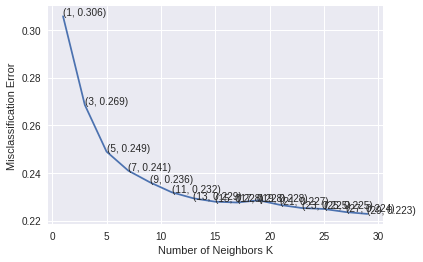

the misclassification error for each k value is :  [0.306 0.269 0.249 0.241 0.236 0.232 0.229 0.228 0.228 0.228 0.227 0.225
 0.225 0.224 0.223]


In [0]:



myList = list(range(0,30,2))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [0]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit( X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform')

In [0]:
cv_scores

In [0]:
pred=knn.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)
print(cm)
print(acc)

[[6879  181]
 [1745  195]]
0.786


In [0]:

X_1, X_test, y_1, y_test =train_test_split(X, y, test_size=0.3, random_state=0)

X_tr, X_cv, y_tr, y_cv =train_test_split(X_1, y_1, test_size=0.3)

for i in range(1,30,2):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_tr, y_tr)
    pred = knn.predict(X_cv)
    f1 =f1_score(y_cv, pred) * float(100)
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = {} is {} and f1 score is {}' .format (i,acc,f1))
    
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))


CV accuracy for k = 1 is 68.53968253968254 and f1 score is 30.309423347398027

CV accuracy for k = 3 is 72.26984126984128 and f1 score is 26.689047419219474

CV accuracy for k = 5 is 74.53968253968254 and f1 score is 23.253588516746408

CV accuracy for k = 7 is 75.68253968253968 and f1 score is 23.015075376884422

CV accuracy for k = 9 is 76.25396825396825 and f1 score is 22.164412070759624

CV accuracy for k = 11 is 76.5873015873016 and f1 score is 21.500798296966472

CV accuracy for k = 13 is 76.87301587301587 and f1 score is 20.772158781946708

CV accuracy for k = 15 is 76.5079365079365 and f1 score is 17.777777777777775

CV accuracy for k = 17 is 77.03174603174602 and f1 score is 18.29474872953134

CV accuracy for k = 19 is 76.93650793650794 and f1 score is 16.73352435530086

CV accuracy for k = 21 is 77.04761904761904 and f1 score is 16.22247972190035

CV accuracy for k = 23 is 76.93650793650794 and f1 score is 15.474112856311809

CV accuracy for k = 25 is 77.14285714285715 and f

In [0]:
knn = KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit( X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [0]:
pred=knn.predict(X_test)

In [0]:
X_test.shape

(9000, 34)

In [0]:
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)
print(cm)
print(acc)

[[6873  187]
 [ 328 1612]]
0.9427777777777778


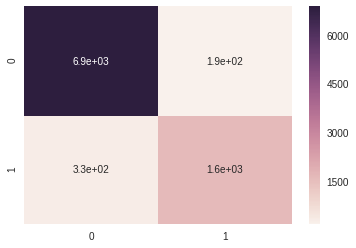

In [0]:
sns.heatmap(cm,annot=True)

In [0]:
X1=df_upsampled.drop('def_pay',axis=1)
y1=df_upsampled['def_pay']

In [0]:
X_1, X_cv1, y_1, y_cv1 =train_test_split(X1, y1, test_size=0.3, random_state=0)


for i in range(1,30,2):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_1, y_1)
    pred = knn.predict(X_cv1)
    f1 =f1_score(y_cv1, pred) * float(100)
    acc = accuracy_score(y_cv1, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = {} is {} and f1 score is {}' .format (i,acc,f1))
    
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))


CV accuracy for k = 1 is 85.58044079593111 and f1 score is 86.70396577258515

CV accuracy for k = 3 is 75.42607299009548 and f1 score is 77.70401554404145

CV accuracy for k = 5 is 70.27750513072188 and f1 score is 72.53689504493363

CV accuracy for k = 9 is 67.52922280717408 and f1 score is 69.272988263109

CV accuracy for k = 11 is 66.81538324261622 and f1 score is 68.48037969319434

CV accuracy for k = 13 is 66.17292763451414 and f1 score is 67.79373035426048

CV accuracy for k = 15 is 65.6197019719818 and f1 score is 67.23918034180767

CV accuracy for k = 17 is 65.6197019719818 and f1 score is 67.22803436250744

CV accuracy for k = 19 is 65.12893727134826 and f1 score is 66.80258239891266

CV accuracy for k = 21 is 64.78986347818328 and f1 score is 66.45128379527291

CV accuracy for k = 23 is 64.40617471223342 and f1 score is 65.93800700196397

CV accuracy for k = 25 is 64.71847952172749 and f1 score is 66.36611092208234

CV accuracy for k = 27 is 64.26340679932186 and f1 score is

In [0]:
knn = KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit( X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [0]:
pred=knn.predict(X_test)

In [0]:
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)
print(cm)
print(acc)

[[6873  187]
 [ 328 1612]]
0.9427777777777778


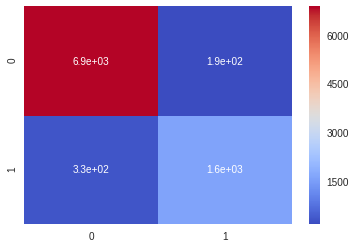

In [0]:
sns.heatmap(cm,cmap='coolwarm',annot=True)

In [0]:
predictions = knn.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
#print(get_feature_importance(ada_downsampled, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))#cm[0,0]

TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
#pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

-------------
f1 score: 0.862
Accuracy: 0.943
-------------
-------------
True Positives: 1612
False Positive: 187
True Negative: 6873
False Negative: 328
Precision: 0.9
Recall: 0.83
Problematic ratio: 0.17


##Decision Trees

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [0]:
depths=[3,5,10,20,30,50,100,150,200]
X_1, X_test, y_1, y_test =train_test_split(X, y, test_size=0.3, random_state=0)

X_tr, X_cv, y_tr, y_cv =train_test_split(X_1, y_1, test_size=0.3)

for i in depths:

    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_tr, y_tr)
    pred = clf.predict(X_cv)
    f1 =f1_score(y_cv, pred) * float(100)
    #cm =f1_score(y_cv, pred) 
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for depth = {} is {} and f1 score is {}' .format (i,acc,f1))
   # print(cm)
    



CV accuracy for depth = 3 is 80.33333333333333 and f1 score is 49.44920440636475

CV accuracy for depth = 5 is 80.44444444444444 and f1 score is 45.293072824156305

CV accuracy for depth = 10 is 78.74603174603175 and f1 score is 43.857442348008384

CV accuracy for depth = 20 is 74.60317460317461 and f1 score is 39.43981831945496

CV accuracy for depth = 30 is 73.06349206349206 and f1 score is 39.92920353982301

CV accuracy for depth = 50 is 73.12698412698413 and f1 score is 40.1555319901025

CV accuracy for depth = 100 is 72.79365079365078 and f1 score is 38.82940756602427

CV accuracy for depth = 150 is 72.33333333333334 and f1 score is 38.3881230116649

CV accuracy for depth = 200 is 72.60317460317461 and f1 score is 38.620199146514935


In [0]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_tr,y_tr)
pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for depth =3 is %d%%' % (acc))
cm=confusion_matrix(y_test,pred)
print(cm)


****Test accuracy for depth =3 is 81%
[[6464  596]
 [1097  843]]


In [0]:
predictions = clf.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
#print(get_feature_importance(ada_downsampled, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))#cm[0,0]

TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
#pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

-------------
f1 score: 0.499
Accuracy: 0.812
-------------
-------------
True Positives: 843
False Positive: 596
True Negative: 6464
False Negative: 1097
Precision: 0.59
Recall: 0.43
Problematic ratio: 0.57


In [0]:
!pip install graphviz

In [0]:
depths=[3,5,10,20,30,50,100,150,200]

for i in depths:

    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X1, y1)
    pred = clf.predict(X_cv)
    f1 =f1_score(y_cv, pred) * float(100)
    #cm =f1_score(y_cv, pred) 
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for depth = {} is {} and f1 score is {}' .format (i,acc,f1))
   # print(cm)
    



CV accuracy for depth = 3 is 77.7936507936508 and f1 score is 51.10101363159734

CV accuracy for depth = 5 is 76.53968253968254 and f1 score is 52.29180116204003

CV accuracy for depth = 10 is 78.46031746031747 and f1 score is 58.130206726319045

CV accuracy for depth = 20 is 89.23809523809524 and f1 score is 77.72667542706965

CV accuracy for depth = 30 is 92.98412698412697 and f1 score is 84.57780879274252

CV accuracy for depth = 50 is 93.65079365079364 and f1 score is 85.82565556343019

CV accuracy for depth = 100 is 93.74603174603175 and f1 score is 86.04815864022663

CV accuracy for depth = 150 is 93.71428571428572 and f1 score is 85.9275053304904

CV accuracy for depth = 200 is 93.7936507936508 and f1 score is 86.14948636202621


In [0]:
clf = DecisionTreeClassifier(max_depth=100)
clf.fit(X_tr,y_tr)
pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for depth =3 is %d%%' % (acc))
cm=confusion_matrix(y_test,pred)
print(cm)


****Test accuracy for depth =3 is 72%
[[5744 1316]
 [1183  757]]


In [0]:
clf = DecisionTreeClassifier(max_depth=20)
clf.fit(X_tr,y_tr)
pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for depth =3 is %d%%' % (acc))
cm=confusion_matrix(y_test,pred)
print(cm)


****Test accuracy for depth =3 is 74%
[[6009 1051]
 [1206  734]]


In [0]:
predictions = knn.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
#print(get_feature_importance(ada_downsampled, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))#cm[0,0]

TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
#pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

-------------
f1 score: 0.5
Accuracy: 0.812
-------------
-------------
True Positives: 847
False Positive: 599
True Negative: 6461
False Negative: 1093
Precision: 0.59
Recall: 0.44
Problematic ratio: 0.56


##Random Forests

In [0]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [0]:
X_1, X_test, y_1, y_test =train_test_split(X, y, test_size=0.3, random_state=0)

X_tr, X_cv, y_tr, y_cv =train_test_split(X_1, y_1, test_size=0.3)

In [0]:
accuracy=[]
f1score=[]
n_est=[5,10,20,30,20,70,100,120,150,200]
for n_estimator in n_est:
  clf=RandomForestClassifier(n_estimators=n_estimator)
  clf.fit(X_tr,y_tr)
  pred=clf.predict(X_cv)
  acc=accuracy_score(pred,y_cv)
  f1=f1_score(pred,y_cv)
  accuracy.append(acc)
  f1score.append(f1)


Text(0,0.5,'F1-Score')

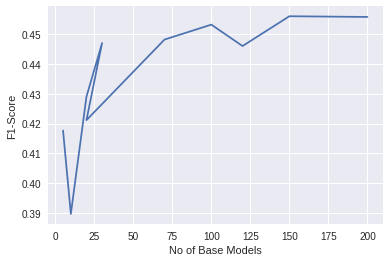

In [0]:

plt.plot(n_est,f1score)
plt.xlabel("No of Base Models")
plt.ylabel("F1-Score")

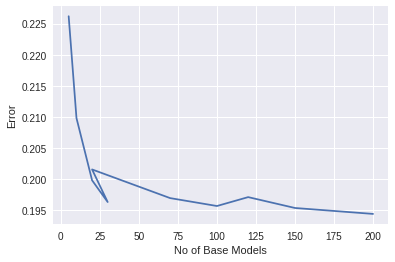

Optimal no of base Estimators are 200


In [0]:
Error=[1-x for x in accuracy]

plt.plot(n_est,Error)
plt.xlabel("No of Base Models")
plt.ylabel("Error")
plt.show()
index=np.array(Error).argmin()
print("Optimal no of base Estimators are {}".format(n_est[index]))

In [0]:
clf=RandomForestClassifier(n_estimators=120)
clf.fit(X_tr,y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
pred=clf.predict(X_test)

In [0]:
  
  acc=accuracy_score(pred,y_test)
  f1=f1_score(pred,y_test)
  cm=confusion_matrix(pred,y_test)

In [0]:
print(acc)
print(f1)
print(cm)

0.8115555555555556
0.44429882044560937
[[6626 1262]
 [ 434  678]]


In [0]:
predictions = clf.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
#print(get_feature_importance(ada_downsampled, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))#cm[0,0]

TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
#pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

-------------
f1 score: 0.444
Accuracy: 0.812
-------------
-------------
True Positives: 678
False Positive: 434
True Negative: 6626
False Negative: 1262
Precision: 0.61
Recall: 0.35
Problematic ratio: 0.65


In [0]:
accuracy=[]
f1score=[]
n_est=[5,10,20,30,20,70,100,120,150,200]
for n_estimator in n_est:
  clf=RandomForestClassifier(n_estimators=n_estimator)
  clf.fit(X1,y1)
  pred=clf.predict(X_cv)
  acc=accuracy_score(pred,y_cv)
  f1=f1_score(pred,y_cv)
  accuracy.append(acc)
  f1score.append(f1)


Text(0,0.5,'F1-Score')

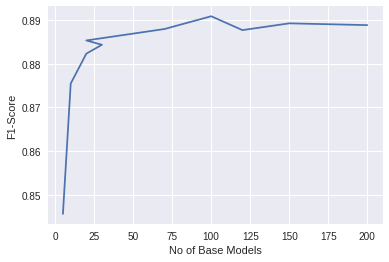

In [0]:

plt.plot(n_est,f1score)
plt.xlabel("No of Base Models")
plt.ylabel("F1-Score")

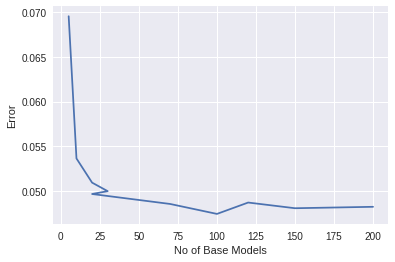

Optimal no of base Estimators are 100


In [0]:
Error=[1-x for x in accuracy]

plt.plot(n_est,Error)
plt.xlabel("No of Base Models")
plt.ylabel("Error")
plt.show()
index=np.array(Error).argmin()
print("Optimal no of base Estimators are {}".format(n_est[index]))

In [0]:
clf=RandomForestClassifier(n_estimators=120)
clf.fit(X1,y1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
pred=clf.predict(X_test) 
acc=accuracy_score(pred,y_test)
f1=f1_score(pred,y_test)
cm=confusion_matrix(pred,y_test)
print(acc)
print(f1)
print(cm)

0.9555555555555556
0.893560404470463
[[6921  261]
 [ 139 1679]]


In [0]:
predictions = clf.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
#print(get_feature_importance(ada_downsampled, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))#cm[0,0]

TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
#pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

-------------
f1 score: 0.894
Accuracy: 0.956
-------------
-------------
True Positives: 1679
False Positive: 139
True Negative: 6921
False Negative: 261
Precision: 0.92
Recall: 0.87
Problematic ratio: 0.13


In [0]:
#GDBT

##GDBT

In [0]:
import xgboost as xgb
clf=xgb.XGBClassifier()
tuned_parameters = {'learning_rate': [10**-1, 10**-2],'n_estimators':[10,30,50,100],'max_depth':[5,10,20]}
model = GridSearchCV(clf, tuned_parameters, scoring = 'f1', cv=3,n_jobs=-1)
model.fit(X1, y1)

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.01], 'n_estimators': [10, 30, 50, 100], 'max_depth': [5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [0]:
model.grid_scores_

[mean: 0.69236, std: 0.00830, params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 10},
 mean: 0.70981, std: 0.00590, params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 30},
 mean: 0.72394, std: 0.00666, params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50},
 mean: 0.74611, std: 0.00490, params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100},
 mean: 0.78480, std: 0.00594, params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 10},
 mean: 0.81768, std: 0.00782, params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 30},
 mean: 0.83625, std: 0.00584, params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50},
 mean: 0.86284, std: 0.00471, params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100},
 mean: 0.87826, std: 0.00173, params: {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 10},
 mean: 0.90627, std: 0.00343, params: {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 30},
 mean: 0.910

In [0]:
print(model.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=20, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [0]:
clf=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=20, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
clf.fit(X1,y1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=20, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
pred=clf.predict(X_test) 
acc=accuracy_score(pred,y_test)
f1=f1_score(pred,y_test)
cm=confusion_matrix(pred,y_test)
print(acc)
print(f1)
print(cm)

0.9523333333333334
0.8873720136518772
[[6881  250]
 [ 179 1690]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [0]:
predictions = clf.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
#print(get_feature_importance(ada_downsampled, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))#cm[0,0]

TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
#pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

-------------
f1 score: 0.887
Accuracy: 0.952
-------------
-------------
True Positives: 1690
False Positive: 179
True Negative: 6881
False Negative: 250
Precision: 0.9
Recall: 0.87
Problematic ratio: 0.13


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


##Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
def transform(x):
  if x==0:
    return -1
  return 1

In [0]:
y=y.apply(transform)

In [0]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
clf=LogisticRegression()
model = GridSearchCV(clf, tuned_parameters, scoring ='accuracy', cv=10,n_jobs=-1)
model.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [0]:
print(model.best_estimator_)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [0]:
model.grid_scores_

[mean: 0.77867, std: 0.00025, params: {'C': 0.0001},
 mean: 0.77867, std: 0.00025, params: {'C': 0.01},
 mean: 0.77867, std: 0.00025, params: {'C': 1},
 mean: 0.77867, std: 0.00025, params: {'C': 100},
 mean: 0.77867, std: 0.00025, params: {'C': 10000}]

In [0]:
print(model.score(X_test, y_test))

0.0


In [0]:
clf=LogisticRegression()
#penalty = ['l1', 'l2']
#uniform(loc=10**-4, scale=10**2)
C=np.random.uniform(10**-4,10**4,size=20)
hyperparameters = dict(C=C)
#params={'C': [randint.rvs(10**-4,200)]}
model = RandomizedSearchCV(clf,param_distributions=hyperparameters, refit=True,scoring ='f1', cv=5,n_jobs=

In [0]:
lgr=LogisticRegression()
lgr.fit(X_train_2,y_train)
y_pred=lgr.predict(X_test_2)
cm=confusion_matrix(y_test,y_pred)
print(cm)

In [0]:
C_values=[1000,100,1,0.01,0.001,0.0001]
for val in C_values:
  clf=LogisticRegression(C=val,penalty='l1')
  clf.fit(X,y)
  w=clf.coef_
  count = np.count_nonzero(w)
  lamda=1/val
  print("Number of Non-Zero Coefficients for lamda = {} is {}".format(lamda,count))

Number of Non-Zero Coefficients for lamda = 0.001 is 34
Number of Non-Zero Coefficients for lamda = 0.01 is 34
Number of Non-Zero Coefficients for lamda = 1.0 is 33
Number of Non-Zero Coefficients for lamda = 100.0 is 22
Number of Non-Zero Coefficients for lamda = 1000.0 is 16
Number of Non-Zero Coefficients for lamda = 10000.0 is 13


In [0]:
coef=lgr.coef_.flatten()

In [0]:
estimator1=LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
estimator1.fit(X,y)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [0]:
Noice = np.random.normal(0, 0.01,X.shape[0] )
Noice=Noice.reshape(-1,1)
X_train_new=np.array(X)+Noice

In [0]:
estimator2=LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
estimator2.fit(X_train_new,y)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [0]:
(estimator2.coef_).shape

(1, 34)

In [0]:
coef1=estimator1.coef_.flatten()
coef2=estimator2.coef_.flatten()
percentage_changes=[]
for i in range(len(coef1)):
  diff=(coef1[i]-coef2[i])/coef1[i]
  percentage_changes.append(diff*100)

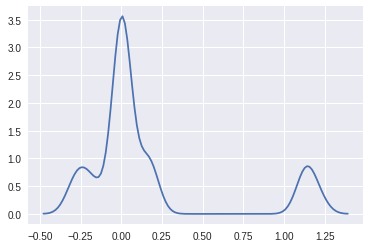

In [0]:
sns.kdeplot(np.array(percentage_changes))

Text(0,0.5,'% change in weights')

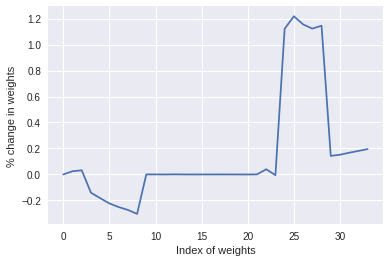

In [0]:
plt.plot(range(0,34),percentage_changes)
plt.xlabel("Index of weights")
plt.ylabel("% change in weights")

#Database

In [0]:
import sqlite3
from sqlalchemy import create_engine
import datetime as dt
import os

In [0]:
!pip install sqlalchemy

In [0]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [0]:
if not os.path.isfile('data.db'):
    
    disk_engine = create_engine('sqlite:///data.db')
    start = dt.datetime.now()
    chunksize = 5000
    j = 0
    index_start = 1
    for df in pd.read_csv('./Creditcard_raw_data/UCI_Credit_Card.csv', names=df.columns, chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1
    print("Time taken to run this cell :", dt.datetime.now() - start)

5000 rows
10000 rows
15000 rows
20000 rows
25000 rows
30000 rows
35000 rows
Time taken to run this cell : 0:00:01.446886


In [0]:
if os.path.isfile('data.db'):
    start = dt.datetime.now()
    con = sqlite3.connect('data.db')
    num_rows = pd.read_sql_query("""SELECT count(*) FROM data""", con)
    #Always remember to close the database
    print("Number of rows in the database :","\n",num_rows['count(*)'].values[0])
    con.close()
    print("Time taken to count the number of rows :", dt.datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the above cell to genarate train.db file")

Number of rows in the database : 
 30001
Time taken to count the number of rows : 0:00:00.005493


In [0]:
num_rows

,count(*)
0,30001


In [0]:
if os.path.isfile('data.db'):
    start = dt.datetime.now()
    con = sqlite3.connect('data.db')

    df_no_dup = pd.read_sql_query("""SELECT *, COUNT(*) as cnt_dup FROM data GROUP BY ID""", con)
    con.close()
    print("Time taken to run this cell :", dt.datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the first to genarate train.db file")

Time taken to run this cell : 0:00:00.420869


In [0]:
len(df_no_dup)

30001

In [0]:
df_no_dup.head(5)

,index,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,cnt_dup
0,2,1,20000,2,2,1,24,2,2,-1,...,0,0,0,689,0,0,0,0,1,1
1,11,10,20000,1,3,2,35,-2,-2,-2,...,13007,13912,0,0,0,13007,1122,0,0,1
2,101,100,20000,1,2,1,38,0,0,0,...,17928,150,1699,1460,626,1750,150,0,1,1
3,1001,1000,120000,1,2,2,25,2,2,0,...,86434,88802,0,5000,3158,3934,3802,2000,0,1
4,25001,10000,230000.0,1,2,1,36,0,0,0,...,19255,17479,3000.0,3000.0,3000.0,3000,3000.0,3000.0,0,1


In [0]:
df_no_dup.drop(['index','cnt_dup'],axis=1,inplace=True)

In [0]:
df_no_dup.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0
2,100,20000,1,2,1,38,0,0,0,0,...,18240,17928,150,1699,1460,626,1750,150,0,1
3,1000,120000,1,2,2,25,2,2,0,0,...,83858,86434,88802,0,5000,3158,3934,3802,2000,0
4,10000,230000.0,1,2,1,36,0,0,0,0,...,19506.0,19255,17479,3000.0,3000.0,3000.0,3000,3000.0,3000.0,0


In [0]:
if not os.path.isfile('train_no_dup.db'):
    disk_dup = create_engine("sqlite:///train_no_dup.db")
    no_dup = pd.DataFrame(df_no_dup, columns=df_no_dup.columns)
    no_dup.to_sql('no_dup_train',disk_dup)

In [0]:

#creating the connection with database file.
if os.path.isfile('train_no_dup.db'):
    start = dt.datetime.now()
    con = sqlite3.connect('train_no_dup.db')
    credit_data = pd.read_sql_query("""SELECT * FROM no_dup_train""", con)
    
    con.close()

    
    credit_data.drop('index',axis=1,inplace=True)

    print("Time taken to run this cell :", dt.datetime.now() - start)


Time taken to run this cell : 0:00:00.304322


In [0]:
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0
2,100,20000,1,2,1,38,0,0,0,0,...,18240,17928,150,1699,1460,626,1750,150,0,1
3,1000,120000,1,2,2,25,2,2,0,0,...,83858,86434,88802,0,5000,3158,3934,3802,2000,0
4,10000,230000.0,1,2,1,36,0,0,0,0,...,19506.0,19255,17479,3000.0,3000.0,3000.0,3000,3000.0,3000.0,0


#Creating DBtables

In [0]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def checkTableExists(dbcon,table_name):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

def create_database_table(database, query):
    conn = create_connection(database)
    if conn is not None:
        create_table(conn, query)
        checkTableExists(conn)
    else:
        print("Error! cannot create the database connection.")
    conn.close()

sql_create_table = """CREATE TABLE IF NOT EXISTS TableProcessed ('ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month');"""
create_database_table("Processed.db", sql_create_table)

Tables in the databse:
TableProcessed


In [0]:
start = dt.datetime.now()
read_db = 'train_no_dup.db'
write_db = 'Processed.db'
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT * From no_dup_train ORDER BY RANDOM() LIMIT 30000;")

In [0]:
if os.path.isfile(write_db):
    conn_w = create_connection(write_db)
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer =conn_w.cursor()
        if tables != 0:
          for i in range(len(credit_data)-1):
            tup=credit_data.iloc[i]['LIMIT_BAL']
          
            writer.execute("insert into TableProcessed( LIMIT_BAL ) values (?)",tup)


In [0]:
conn_r.commit()
conn_w.commit()
conn_r.close()

In [0]:
conn_w.close()

In [0]:
from sklearn.cluster import KMeans

In [0]:
df.drop(['default.payment.next.month','ID'],axis=1,inplace=True)

In [0]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [0]:
X=np.array(df)

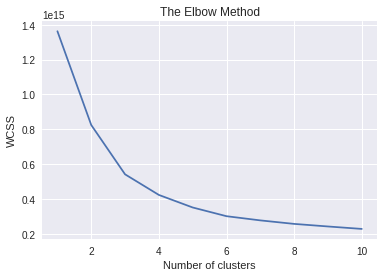

In [0]:
wcss=[]
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init ='k-means++', random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
kmeans = KMeans(n_clusters = 5, init ='k-means++', random_state = 0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [0]:
df['cluster']=kmeans.labels_

In [0]:
df['cluster'].value_counts()

4    13529
0     7443
3     4440
2     3381
1     1207
Name: cluster, dtype: int64

In [0]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,cluster
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,4
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,4
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,4
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,4
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,4
